# Plot for App

In [9]:
import pandas as pd
import pandas as pd
from pathlib import Path
from config import *
from ppp_prediction.plot.utils import save_fig
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# setting global font as calibri
plt.rcParams["font.family"] = "Calibri"

Figure6Dir = FigureDir / "Figure6"
Figure6Dir.mkdir(exist_ok=True, parents=True)

## Figure6

In [10]:
compare_res_df_fdr = pd.read_feather(RawDataDir / "Phone_qt_df.feather")
compare_res_df_fdr

,Feature,Traits,pearsonr,spearmanr,N,R2,p_adj,pvalue,R2_SE,R2_LCI,R2_UCI,R2 (95% CI)
0,Face,Age,0.886285,0.872709,110.0,0.785501,2.998469e-86,5.260472e-88,0.035119,0.715263,0.855738,"0.786 (0.715, 0.856)"
1,Face,Height,0.718001,0.670828,104.0,0.515526,5.840332e-24,2.049239e-25,0.065966,0.383594,0.647458,"0.516 (0.384, 0.647)"
2,Face,Weight,0.708498,0.698309,103.0,0.501970,1.167628e-22,6.145412e-24,0.067217,0.367537,0.636403,"0.502 (0.368, 0.636)"
3,Face,BMI,0.617861,0.607347,106.0,0.381753,1.587715e-14,1.114186e-15,0.071799,0.238155,0.525350,"0.382 (0.238, 0.525)"
4,Face,RBC,0.477506,0.491986,57.0,0.228012,3.966344e-04,5.566799e-05,0.091854,0.044304,0.411720,"0.228 (0.044, 0.412)"
5,Face,Cr,0.475419,0.388958,107.0,0.226024,3.499273e-07,3.069538e-08,0.068859,0.088305,0.363742,"0.226 (0.088, 0.364)"
6,Face,ALP,0.469732,0.462591,54.0,0.220649,7.889712e-04,1.245744e-04,0.093403,0.033843,0.407454,"0.221 (0.034, 0.407)"
7,Face,HDLC,0.423971,0.418713,107.0,0.179752,1.531001e-05,1.611580e-06,0.065079,0.049594,0.309910,"0.180 (0.050, 0.310)"
8,Face,Hb,0.416151,0.379363,55.0,0.173182,4.917587e-03,8.627346e-04,0.087089,-0.000996,0.347360,"0.173 (-0.001, 0.347)"
9,Face,eGFR(CKD-EPI),0.374358,0.450339,105.0,0.140144,3.404375e-04,4.180811e-05,0.060771,0.018601,0.261687,"0.140 (0.019, 0.262)"


In [11]:
queried_res = compare_res_df_fdr["R2"].describe().round(3)
print(
    f"queried_res: {queried_res['50%']}, IQR: {queried_res['25%']} - {queried_res['75%']}"
)

queried_res: 0.027, IQR: 0.006 - 0.074


In [12]:
# 1) qt_df
metrics_qt_df = pd.read_feather(RawDataDir / "metrics_qt.feather")
# add system annotations
System_mapping_df = pd.concat(
    [
        pd.DataFrame(System_traits_map[k])
        .rename(columns={0: "Biomarker Code"})
        .assign(System=k)
        for k in System_traits_map.keys()
    ]
)

In [13]:
compare_res_df_fdr_system = compare_res_df_fdr.merge(
    System_mapping_df,
    left_on="Traits",
    right_on="Biomarker Code",
)
compare_res_df_fdr_system

,Feature,Traits,pearsonr,spearmanr,N,R2,p_adj,pvalue,R2_SE,R2_LCI,R2_UCI,R2 (95% CI),Biomarker Code,System
0,Face,Age,0.886285,0.872709,110.0,0.785501,2.998469e-86,5.260472e-88,0.035119,0.715263,0.855738,"0.786 (0.715, 0.856)",Age,Anthropometrics
1,Face,Height,0.718001,0.670828,104.0,0.515526,5.840332e-24,2.049239e-25,0.065966,0.383594,0.647458,"0.516 (0.384, 0.647)",Height,Anthropometrics
2,Face,Weight,0.708498,0.698309,103.0,0.501970,1.167628e-22,6.145412e-24,0.067217,0.367537,0.636403,"0.502 (0.368, 0.636)",Weight,Anthropometrics
3,Face,BMI,0.617861,0.607347,106.0,0.381753,1.587715e-14,1.114186e-15,0.071799,0.238155,0.525350,"0.382 (0.238, 0.525)",BMI,Anthropometrics
4,Face,RBC,0.477506,0.491986,57.0,0.228012,3.966344e-04,5.566799e-05,0.091854,0.044304,0.411720,"0.228 (0.044, 0.412)",RBC,Hematology
5,Face,Cr,0.475419,0.388958,107.0,0.226024,3.499273e-07,3.069538e-08,0.068859,0.088305,0.363742,"0.226 (0.088, 0.364)",Cr,Renal
6,Face,ALP,0.469732,0.462591,54.0,0.220649,7.889712e-04,1.245744e-04,0.093403,0.033843,0.407454,"0.221 (0.034, 0.407)",ALP,Digestive
7,Face,HDLC,0.423971,0.418713,107.0,0.179752,1.531001e-05,1.611580e-06,0.065079,0.049594,0.309910,"0.180 (0.050, 0.310)",HDLC,Cardiovascular
8,Face,Hb,0.416151,0.379363,55.0,0.173182,4.917587e-03,8.627346e-04,0.087089,-0.000996,0.347360,"0.173 (-0.001, 0.347)",Hb,Hematology
9,Face,eGFR(CKD-EPI),0.374358,0.450339,105.0,0.140144,3.404375e-04,4.180811e-05,0.060771,0.018601,0.261687,"0.140 (0.019, 0.262)",eGFR(CKD-EPI),Renal


### Figure6c

/tmp/ipykernel_1852997/2228747582.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


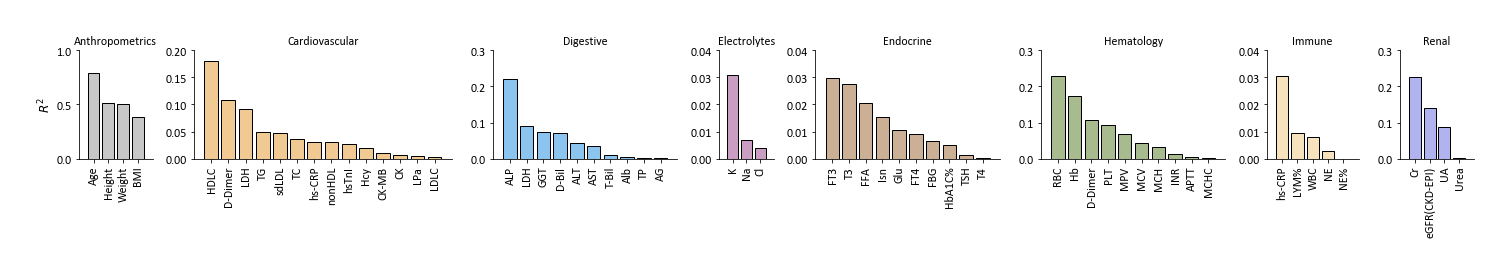

In [19]:
show_systems = System_traits_map.keys()
plt_data = compare_res_df_fdr_system.query("System in @show_systems")
plt_data["System"] = pd.Categorical(plt_data["System"], show_systems, ordered=True)
col_numbers = plt_data["System"].nunique()


width_ratios = [
    subdata["Traits"].nunique() for _, subdata in plt_data.groupby("System")
]
fig, axes = plt.subplots(
    1,
    plt_data["System"].nunique(),
    # figsize=(sum(width_ratios) * 0.4, 4),
    figsize=(25, 2),
    # sharey=True,
    gridspec_kw={"width_ratios": width_ratios, "wspace": 0.3},
)

for i, (system, system_df) in enumerate(plt_data.groupby("System")):

    ax = axes[i]
    # set order of x
    order = system_df.sort_values("R2", ascending=False)["Traits"].unique().tolist()

    ax = sns.barplot(
        x="Traits",
        y="R2",
        data=system_df,
        ax=ax,
        # palette="Blues_d",
        # order=system_df["Traits"],
        order=order,
        hue="System",
        edgecolor="black",
        lw=1,
        # hue_order = hue_pallete_dict.keys(),
        # palette=hue_pallete_dict,
        palette=[
            "#C7C7C7",
            "#FFCC83",
            "#7BC7FE",
            "#D197C6",
            "#D4B08D",
            "#A9C287",
            "#FFE6B4",
            "#A5AAF9",
        ],
    )
    ax.set_xlabel("")

    if i != 0:
        ax.set_ylabel("")
    else:
        ax.set_ylabel(r"$R^2$", fontsize=12)
    ax.legend().set_visible(False)
    plt.setp(ax.get_xticklabels(), rotation=90, fontsize=12)
    plt.setp(ax.get_yticklabels(), rotation=0, fontsize=12)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(system, fontsize=12)
    ylim_upper = ax.get_ylim()[1]
    from ppp_prediction.plot.utils import nice_ticks

    yticks = nice_ticks(0, ylim_upper)
    # ax.set_yticks(np.arange(0, ylim_upper, 0.05 if ylim_upper <= 0.4 else 0.1))
    ax.set_yticks(yticks)

    # ax.set_yticklabels([])
    # ax.set_yticklabels([])
    # ax.set_ylim([0, 1])
    ax.set_xlim(ax.get_xlim()[0] - 0.5, ax.get_xlim()[1] + 0.5)
# add sup xlabel
fig.tight_layout()
save_fig(fig, Figure6Dir / "Figure6c", dpi=default_dpi)

### Figure6d

In [ ]:
ICC_df_by_center = pd.read_feather(RawDataDir / "ICC_df_by_center_APP.feather")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


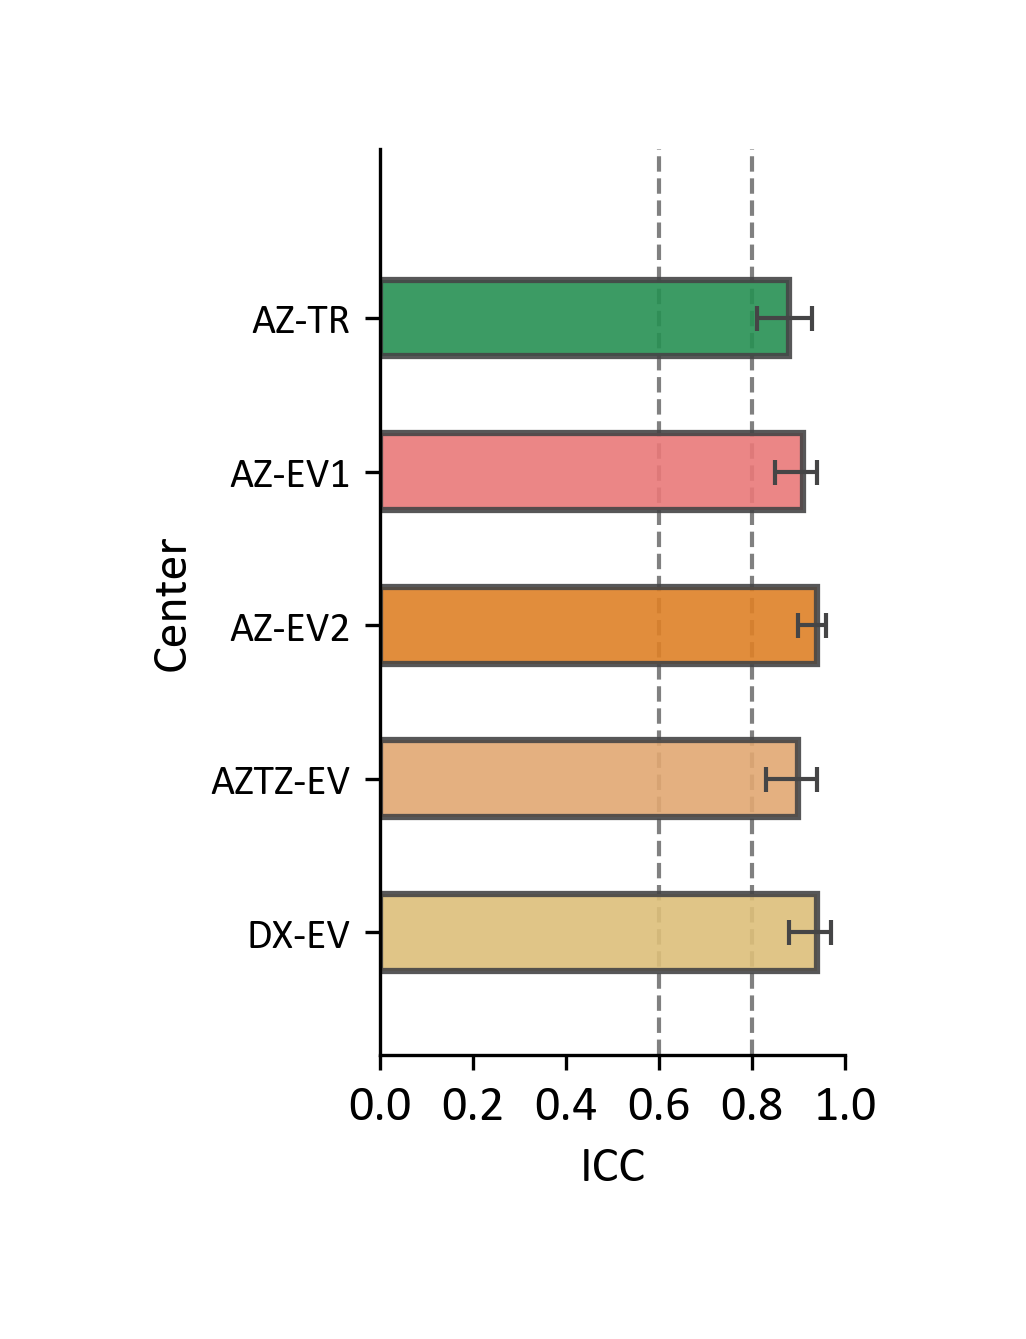

In [21]:
fig, ax = plt.subplots(figsize=(2, 4), dpi=300)
# ax.imshow(img)
centers = [
    "AZ-TR",
    "AZ-EV1",
    "AZ-EV2",
    "AZTZ-EV",
    "DX-EV",
    # "AZ-GEV"
]
Center_color_dict = {
    "AZ-TR": "#16A150",
    "AZ-EV1": "#FC6666",
    "AZ-EV2": "#FD8008",
    "AZTZ-EV": "#F4A75F",
    "DX-EV": "#EDC66A",
    # "AZ-GEV": "#999999",
}
ax.axvline(x=0.8, color="grey", linestyle="--", lw=1, zorder=1)
ax.axvline(x=0.6, color="grey", linestyle="--", lw=1, zorder=1)
sns.barplot(
    ICC_df_by_center,
    y="ComapreCenter",
    x="ICC",
    hue="ComapreCenter",
    ax=ax,
    order=centers[::-1],
    palette=Center_color_dict,
    edgecolor="#454546",
    alpha=0.9,
    lw=1.5,
    width=0.5,
)

# add errobar
ax.errorbar(
    y=ICC_df_by_center.ComapreCenter,
    x=ICC_df_by_center.ICC,
    xerr=(
        ICC_df_by_center["ICC"] - ICC_df_by_center["ICC_LCI"],
        ICC_df_by_center["ICC_UCI"] - ICC_df_by_center["ICC"],
    ),
    fmt="none",
    ecolor="#454546",
    capsize=3,
    capthick=1,
    elinewidth=1,
    alpha=1,
    lw=1,
)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlim(0, 1)
ax.set_ylim(-0.8, 5.1)
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.setp(ax.get_xticklabels(), fontsize=12, rotation=0)

ax.set_ylabel("Center", fontsize=12)

# ax.set_title("ICC", fontsize=12)
ax.set_xlabel("ICC", fontsize=12)
save_fig(fig, Figure6Dir / "Figure6d", dpi=default_dpi)